## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

In [1]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pmdarima 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install  blosc2~=2.0.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels

## Loading Data of the Superstore

In [4]:
df=pd.read_excel('Sample - Superstore.xls')

In [5]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## EDA

In [6]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [7]:
df.index

RangeIndex(start=0, stop=9994, step=1)

In [12]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [13]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [15]:
df.index.isna().any()

False

In [18]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [19]:
df = df.sort_values(by='Order Date', ascending=True)

In [20]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7980,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
739,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
740,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
741,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
1759,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
908,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
907,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
1296,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188


In [22]:
df['Row ID'].isna().any()

False

In [23]:
df['City'].value_counts().reset_index()

,City,count
0,New York City,915
1,Los Angeles,747
2,Philadelphia,537
3,San Francisco,510
4,Seattle,428
...,...,...
526,Holyoke,1
527,Yucaipa,1
528,Murrieta,1
529,Antioch,1


In [24]:
df['Segment'].value_counts().reset_index()

,Segment,count
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


In [25]:
df['State'].value_counts().reset_index()

,State,count
0,California,2001
1,New York,1128
2,Texas,985
3,Pennsylvania,587
4,Washington,506
5,Illinois,492
6,Ohio,469
7,Florida,383
8,Michigan,255
9,North Carolina,249


# Selecting only Los Angeles,California and Paper as Sub- Category data

In [26]:
temp1=df[(df['State']=='California') & (df['City']=='Los Angeles')]
temp1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5327,5328,CA-2014-130813,2014-01-06,2014-01-08,Second Class,LS-17230,Lycoris Saunders,Consumer,United States,Los Angeles,...,90049,West,OFF-PA-10002005,Office Supplies,Paper,Xerox 225,19.440,3,0.0,9.3312
5736,5737,CA-2014-148614,2014-01-20,2014-01-25,Standard Class,MV-17485,Mark Van Huff,Consumer,United States,Los Angeles,...,90049,West,OFF-PA-10002893,Office Supplies,Paper,"Wirebound Service Call Books, 5 1/2"" x 4""",19.360,2,0.0,9.2928
5737,5738,CA-2014-148614,2014-01-20,2014-01-25,Standard Class,MV-17485,Mark Van Huff,Consumer,United States,Los Angeles,...,90049,West,FUR-FU-10003194,Furniture,Furnishings,"Eldon Expressions Desk Accessory, Wood Pencil ...",19.300,2,0.0,5.7900
8503,8504,CA-2014-164903,2014-02-20,2014-02-24,Standard Class,SR-20740,Steven Roelle,Home Office,United States,Los Angeles,...,90049,West,OFF-PA-10003363,Office Supplies,Paper,Xerox 204,12.960,2,0.0,6.2208
3555,3556,CA-2014-120838,2014-03-23,2014-03-26,Second Class,PO-18865,Patrick O'Donnell,Consumer,United States,Los Angeles,...,90036,West,TEC-PH-10003484,Technology,Phones,Ooma Telo VoIP Home Phone System,604.752,6,0.2,37.7970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4619,4620,CA-2017-145219,2017-12-24,2017-12-25,First Class,RM-19675,Robert Marley,Home Office,United States,Los Angeles,...,90049,West,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,2879.952,6,0.2,1007.9832
6074,6075,CA-2017-121398,2017-12-25,2017-12-29,Standard Class,FH-14365,Fred Hopkins,Corporate,United States,Los Angeles,...,90008,West,OFF-BI-10001718,Office Supplies,Binders,GBC DocuBind P50 Personal Binding Machine,153.552,3,0.2,51.8238
6075,6076,CA-2017-121398,2017-12-25,2017-12-29,Standard Class,FH-14365,Fred Hopkins,Corporate,United States,Los Angeles,...,90008,West,OFF-ST-10002756,Office Supplies,Storage,"Tennsco Stur-D-Stor Boltless Shelving, 5 Shelv...",270.620,2,0.0,2.7062
1877,1878,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,James Galang,Consumer,United States,Los Angeles,...,90049,West,FUR-CH-10002880,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",393.568,4,0.2,-44.2764


In [27]:
fd=temp1[temp1['Sub-Category']=='Paper']
fd

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5327,5328,CA-2014-130813,2014-01-06,2014-01-08,Second Class,LS-17230,Lycoris Saunders,Consumer,United States,Los Angeles,...,90049,West,OFF-PA-10002005,Office Supplies,Paper,Xerox 225,19.44,3,0.0,9.3312
5736,5737,CA-2014-148614,2014-01-20,2014-01-25,Standard Class,MV-17485,Mark Van Huff,Consumer,United States,Los Angeles,...,90049,West,OFF-PA-10002893,Office Supplies,Paper,"Wirebound Service Call Books, 5 1/2"" x 4""",19.36,2,0.0,9.2928
8503,8504,CA-2014-164903,2014-02-20,2014-02-24,Standard Class,SR-20740,Steven Roelle,Home Office,United States,Los Angeles,...,90049,West,OFF-PA-10003363,Office Supplies,Paper,Xerox 204,12.96,2,0.0,6.2208
6017,6018,CA-2014-102652,2014-04-06,2014-04-12,Standard Class,AY-10555,Andy Yotov,Corporate,United States,Los Angeles,...,90049,West,OFF-PA-10003309,Office Supplies,Paper,Xerox 211,19.44,3,0.0,9.3312
6018,6019,CA-2014-102652,2014-04-06,2014-04-12,Standard Class,AY-10555,Andy Yotov,Corporate,United States,Los Angeles,...,90049,West,OFF-PA-10001977,Office Supplies,Paper,Xerox 194,55.48,1,0.0,26.6304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,2351,CA-2017-109701,2017-12-02,2017-12-03,Same Day,AM-10360,Alice McCarthy,Corporate,United States,Los Angeles,...,90032,West,OFF-PA-10003724,Office Supplies,Paper,"Wirebound Message Book, 4 per Page",10.86,2,0.0,5.3214
8390,8391,CA-2017-153227,2017-12-04,2017-12-06,First Class,CS-12250,Chris Selesnick,Corporate,United States,Los Angeles,...,90032,West,OFF-PA-10001838,Office Supplies,Paper,Adams Telephone Message Book W/Dividers/Space ...,11.76,2,0.0,5.7624
6551,6552,CA-2017-161578,2017-12-16,2017-12-21,Second Class,RB-19465,Rick Bensley,Home Office,United States,Los Angeles,...,90036,West,OFF-PA-10002986,Office Supplies,Paper,Xerox 1898,13.36,2,0.0,6.4128
2887,2888,CA-2017-102099,2017-12-18,2017-12-19,First Class,EP-13915,Emily Phan,Consumer,United States,Los Angeles,...,90008,West,OFF-PA-10003172,Office Supplies,Paper,Xerox 1996,12.96,2,0.0,6.2208


In [28]:
fd1=fd.groupby('Order Date')['Quantity'].sum().reset_index()

In [29]:
fd2= fd1.groupby(pd.Grouper(key='Order Date', axis=0,freq='M')).sum()

In [30]:
fd3= fd2.tail(27)
fd3

,Quantity
Order Date,
2015-10-31,0
2015-11-30,35
2015-12-31,10
2016-01-31,5
2016-02-29,7
2016-03-31,8
2016-04-30,12
2016-05-31,27
2016-06-30,21


<Axes: xlabel='Order Date'>

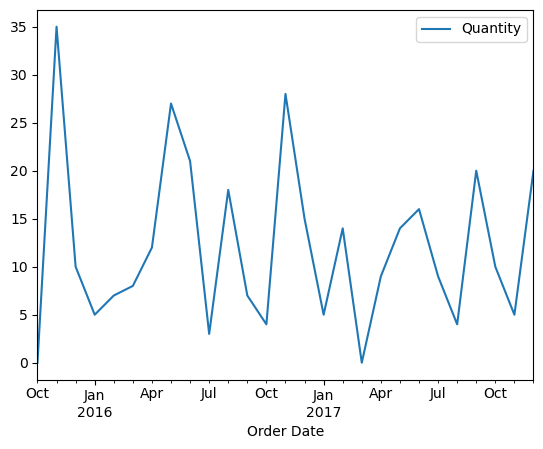

In [31]:
fd3.plot()

In [69]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
adfuller(fd3)
#the p value 0.771053019492203 is > 0.05, the data isnt stationary

(-0.9500239402190347,
 0.771053019492203,
 6,
 20,
 {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125},
 112.79031150750554)

In [33]:
#making the data stationary
fd3_log=np.sqrt(fd3['Quantity'])
fd3_diff=fd3_log.diff().dropna()

In [70]:
fd3_diff

Order Date
2015-11-30    5.916080
2015-12-31   -2.753802
2016-01-31   -0.926210
2016-02-29    0.409683
2016-03-31    0.182676
2016-04-30    0.635674
2016-05-31    1.732051
2016-06-30   -0.613577
2016-07-31   -2.850525
2016-08-31    2.510590
2016-09-30   -1.596889
2016-10-31   -0.645751
2016-11-30    3.291503
2016-12-31   -1.418519
2017-01-31   -1.636915
2017-02-28    1.505589
2017-03-31   -3.741657
2017-04-30    3.000000
2017-05-31    0.741657
2017-06-30    0.258343
2017-07-31   -1.000000
2017-08-31   -1.000000
2017-09-30    2.472136
2017-10-31   -1.309858
2017-11-30   -0.926210
2017-12-31    2.236068
Freq: M, Name: Quantity, dtype: float64

<Axes: xlabel='Order Date'>

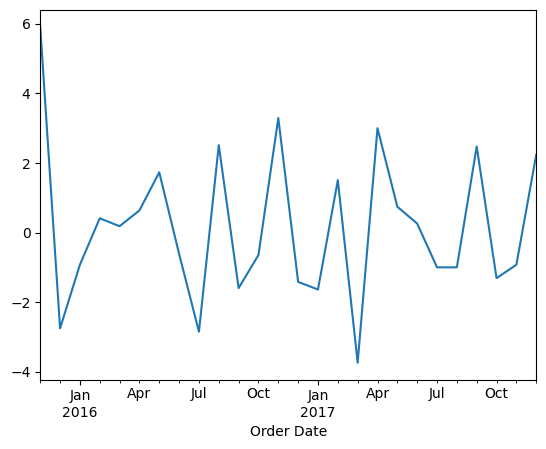

In [34]:
fd3_diff.plot()

In [35]:
from statsmodels.tsa.stattools import adfuller
adfuller(fd3_diff)
#the p value  0.0026168602872771855 is > 0.05, the data stationary

(-3.829785134665822,
 0.0026168602872771855,
 5,
 20,
 {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125},
 61.76691844101039)

In [36]:
#checking
grp= df.groupby(['Sub-Category','Product Name']).size().reset_index()
grp

,Sub-Category,Product Name,0
0,Accessories,AmazonBasics 3-Button USB Wired Mouse,5
1,Accessories,Anker Ultra-Slim Mini Bluetooth 3.0 Wireless K...,5
2,Accessories,Anker Ultrathin Bluetooth Wireless Keyboard Al...,4
3,Accessories,Belkin F8E887 USB Wired Ergonomic Keyboard,8
4,Accessories,Belkin QODE FastFit Bluetooth Keyboard,2
...,...,...,...
1845,Tables,"Riverside Furniture Oval Coffee Table, Oval En...",5
1846,Tables,Riverside Furniture Stanwyck Manor Table Series,3
1847,Tables,"SAFCO PlanMaster Boards, 60w x 37-1/2d, White ...",5
1848,Tables,SAFCO PlanMaster Heigh-Adjustable Drafting Tab...,5


In [38]:
grp= df.groupby(['Sub-Category','Product Name','Quantity','Order Date']).size().reset_index()
grp

,Sub-Category,Product Name,Quantity,Order Date,0
0,Accessories,AmazonBasics 3-Button USB Wired Mouse,2,2015-11-09,1
1,Accessories,AmazonBasics 3-Button USB Wired Mouse,2,2015-11-20,1
2,Accessories,AmazonBasics 3-Button USB Wired Mouse,3,2016-06-26,1
3,Accessories,AmazonBasics 3-Button USB Wired Mouse,3,2017-07-07,1
4,Accessories,AmazonBasics 3-Button USB Wired Mouse,4,2015-12-12,1
...,...,...,...,...,...
9981,Tables,SAFCO PlanMaster Heigh-Adjustable Drafting Tab...,5,2017-04-29,1
9982,Tables,Safco Drafting Table,1,2017-11-21,1
9983,Tables,Safco Drafting Table,2,2016-03-21,1
9984,Tables,Safco Drafting Table,3,2014-07-22,1


In [39]:
grp1 = grp[grp['Sub-Category'] == 'Binders'].sort_values(by='Quantity',ascending=False)

In [40]:
grp1.set_index('Order Date')

,Sub-Category,Product Name,Quantity,0
Order Date,,,,
2017-01-01,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",14,1
2017-11-10,Binders,Cardinal EasyOpen D-Ring Binders,14,1
2017-12-14,Binders,Wilson Jones Clip & Carry Folder Binder Tool f...,14,1
2016-06-11,Binders,Wilson Jones Turn Tabs Binder Tool for Ring Bi...,14,1
2016-12-06,Binders,Ibico Recycled Linen-Style Covers,14,1
...,...,...,...,...
2014-12-27,Binders,GBC Standard Therm-A-Bind Covers,1,1
2014-08-04,Binders,Ibico Standard Transparent Covers,1,1
2017-11-23,Binders,GBC Standard Therm-A-Bind Covers,1,1


In [408]:
#subcategory that was selected is paper
grp2 = grp[grp['Sub-Category'] == 'Paper'].sort_values(by='Order Date',ascending=True)
grp2

,Sub-Category,Product Name,Quantity,Order Date,0
6621,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",2,2014-01-03,1
6700,Paper,Southworth 25% Cotton Granite Paper & Envelopes,1,2014-01-06,1
7675,Paper,Xerox 225,3,2014-01-06,1
7149,Paper,Xerox 1923,7,2014-01-13,1
6750,Paper,"TOPS Carbonless Receipt Book, Four 2-3/4 x 7-1...",4,2014-01-19,1
...,...,...,...,...,...
6381,Paper,14-7/8 x 11 Blue Bar Computer Printout Paper,2,2017-12-25,1
7319,Paper,Xerox 1959,3,2017-12-26,1
6657,Paper,"Recycled Desk Saver Line ""While You Were Out"" ...",5,2017-12-26,1
7295,Paper,Xerox 1953,1,2017-12-28,1


In [409]:
grp2.set_index('Order Date')

,Sub-Category,Product Name,Quantity,0
Order Date,,,,
2014-01-03,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",2,1
2014-01-06,Paper,Southworth 25% Cotton Granite Paper & Envelopes,1,1
2014-01-06,Paper,Xerox 225,3,1
2014-01-13,Paper,Xerox 1923,7,1
2014-01-19,Paper,"TOPS Carbonless Receipt Book, Four 2-3/4 x 7-1...",4,1
...,...,...,...,...
2017-12-25,Paper,14-7/8 x 11 Blue Bar Computer Printout Paper,2,1
2017-12-26,Paper,Xerox 1959,3,1
2017-12-26,Paper,"Recycled Desk Saver Line ""While You Were Out"" ...",5,1


In [43]:
grp2['Order Date'] = pd.to_datetime(grp2['Order Date'])

In [44]:
grp3=grp2.groupby('Order Date')['Quantity'].sum().reset_index()
grp3

,Order Date,Quantity
0,2014-01-03,2
1,2014-01-06,4
2,2014-01-13,7
3,2014-01-19,4
4,2014-01-20,2
...,...,...
725,2017-12-24,3
726,2017-12-25,8
727,2017-12-26,8
728,2017-12-28,1


In [45]:
grp4= grp3.groupby(pd.Grouper(key='Order Date', axis=0,freq='M')).sum()
grp4

,Quantity
Order Date,
2014-01-31,32
2014-02-28,19
2014-03-31,92
2014-04-30,63
2014-05-31,50
2014-06-30,53
2014-07-31,65
2014-08-31,109
2014-09-30,138


<Axes: xlabel='Order Date'>

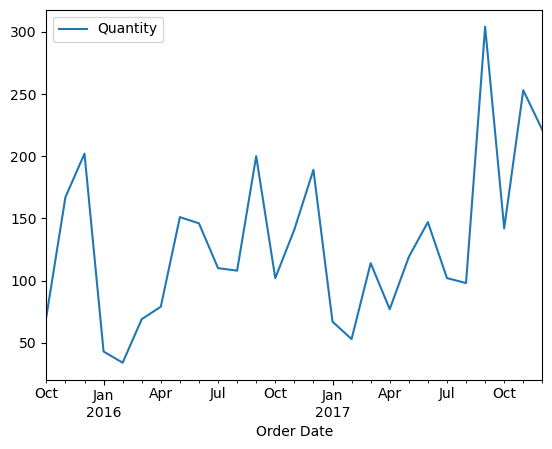

In [436]:
#selecting last 27 months
grp5 = grp4.tail(27)
grp5.plot()

In [303]:
grp6=grp5.head(24)
grp6

,Quantity
Order Date,
2015-10-31,71
2015-11-30,167
2015-12-31,202
2016-01-31,43
2016-02-29,34
2016-03-31,69
2016-04-30,79
2016-05-31,151
2016-06-30,146


In [313]:
grp7=grp5.tail(3)
grp7

,Quantity
Order Date,
2017-10-31,142
2017-11-30,253
2017-12-31,221


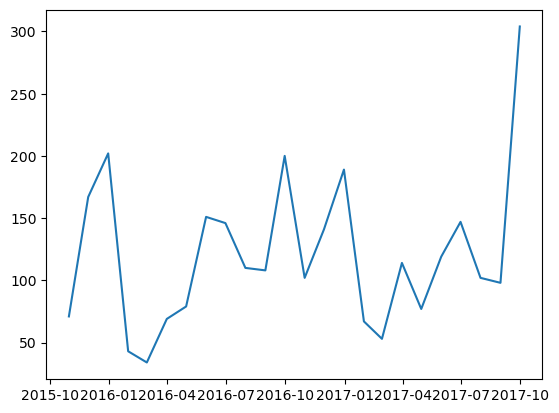

In [96]:
plt.plot(grp6)

In [378]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(grp6['Quantity'])

1. ADF :  -3.373362719788399
2. P-Value :  0.011901152891194587
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 23
5. Critical Values :
	 1% :  -3.7529275211638033
	 5% :  -2.998499866852963
	 10% :  -2.6389669754253307


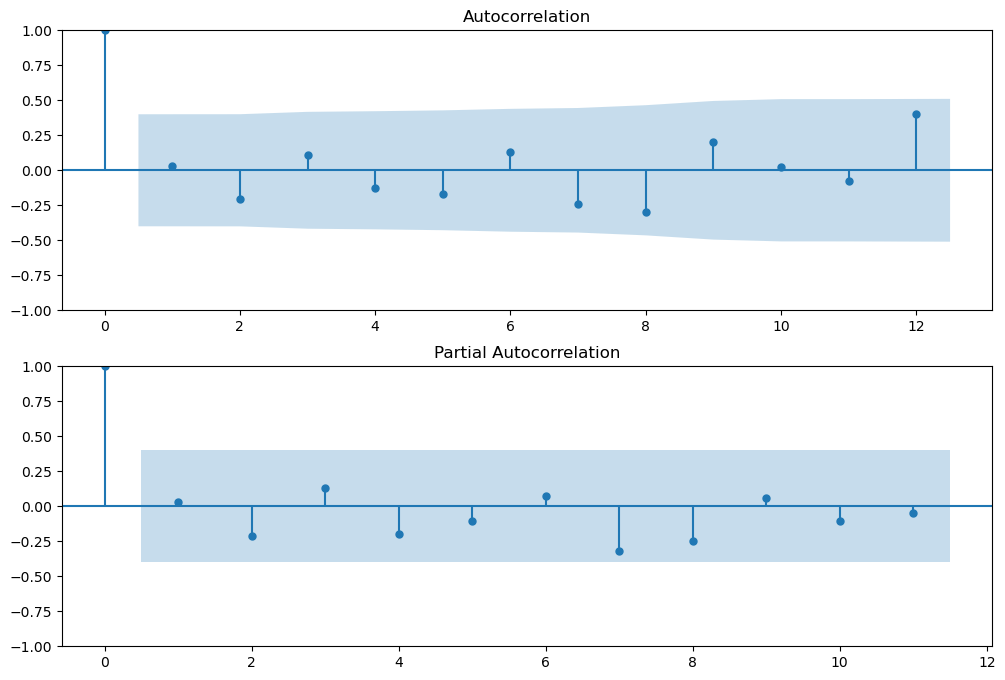

In [305]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig,ax = plt.subplots(2,figsize=(12,8))
ax[0]=plot_acf(grp6['Quantity'],ax=ax[0],lags=12)
ax[1]=plot_pacf(grp6['Quantity'],ax=ax[1],lags=11)

In [308]:
train_set=grp6

In [309]:
train_set

,Quantity
Order Date,
2015-10-31,71
2015-11-30,167
2015-12-31,202
2016-01-31,43
2016-02-29,34
2016-03-31,69
2016-04-30,79
2016-05-31,151
2016-06-30,146


In [314]:
test_set=grp7

In [315]:
test_set

,Quantity
Order Date,
2017-10-31,142
2017-11-30,253
2017-12-31,221


## Model Implementation

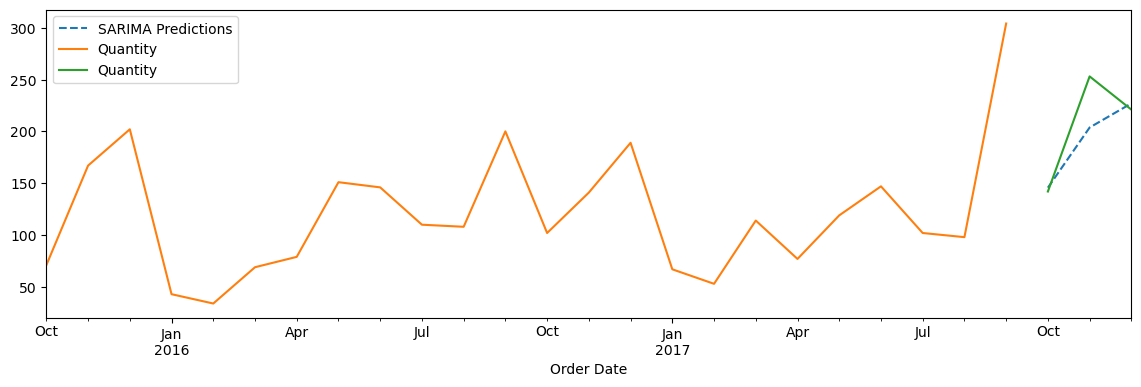

In [406]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming 'Quantity' is the column you want to model in the DataFrames train_set and test_set
order = (2,0,0)          # Non-seasonal order
seasonal_order = (1, 0, 1, 12)  # Seasonal order with a period of 12 (monthly data)

# Create and fit the SARIMA model
model = SARIMAX(train_set['Quantity'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Generate predictions for the test set
pred = results.predict(start=24, end=26, dynamic=False).rename('SARIMA Predictions')

# Plot the predictions along with the actual values
plt.figure(figsize=(14, 4))
pred.plot(legend=True, linestyle='dashed')
train_set['Quantity'].plot(legend=True)
test_set['Quantity'].plot(legend=True)

plt.show()

In [407]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(pred, test_set['Quantity'])

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(pred, test_set['Quantity'])

from math import sqrt
rmse = sqrt(mse)

APE = []
f_bias = []
for i in range(3):
    per_err = ((test_set['Quantity'][i] - pred[i]) / (test_set['Quantity'][i]))
    per_err = abs(per_err)
    diff = test_set['Quantity'][i] - pred[i]
    APE.append(per_err)
    f_bias.append(diff)
MAPE = sum(APE)/len(APE)
forecast_bias = sum(f_bias)

print('MAE: %f' % mae)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)
print(f'''MAPE   : { (MAPE)*100 }''')
print('forecast bias: %f' % forecast_bias)

MAE: 19.656809
MSE: 826.398426
RMSE: 28.747146
MAPE   : 8.26307096103748
forecast bias: 39.613071


In [390]:
train_set

,Quantity
Order Date,
2015-10-31,71
2015-11-30,167
2015-12-31,202
2016-01-31,43
2016-02-29,34
2016-03-31,69
2016-04-30,79
2016-05-31,151
2016-06-30,146


In [400]:
#Actual
test_set

,Quantity
Order Date,
2017-10-31,142
2017-11-30,253
2017-12-31,221


In [401]:
#Forecasted
pred.reset_index()

,index,SARIMA Predictions
0,2017-10-31,145.681686
1,2017-11-30,203.708251
2,2017-12-31,226.996992


## Grid Search to find the best parameters

In [435]:
import itertools
import warnings
from math import sqrt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

# Define the range of parameters
p_params = range(4)
d_params = range(2)  # Adjust based on the characteristics of your data
q_params = range(3)
P_params = range(4)
D_params = range(2)  # Adjust based on the characteristics of your data
Q_params = range(3)
S_params = range(2,12)
# seasonal_params = [(1,0,1,12)]  # Adjust as needed

best_score, best_cfg = float("inf"), None

# Iterate over all possible parameter combinations
for p, d, q,P,D,Q,S in itertools.product(p_params, d_params, q_params, P_params,D_params,Q_params,S_params):
    order = (p, d, q)
    seasonal_order = (P,D,Q,S)
    if p==P | q==Q | d==D :
        continue
    else:
        model = SARIMAX(train_set['Quantity'], order=order, seasonal_order=seasonal_order)
        model_fit = model.fit()

        # Make predictions for the test set
        pred = model_fit.predict(start=24, end=26)

        # Calculate RMSE
        rmse = sqrt(mean_squared_error(test_set['Quantity'], pred))

        print(f"RMSE: {rmse}, Order: {order}, Seasonal Order: {seasonal_order}")

        # Update best parameters if a better combination is found
        if rmse < best_score:
            best_score, best_cfg = rmse, (order, seasonal_order)

print("Best parameters:", best_score, best_cfg)

RMSE: 146.17988729994866, Order: (0, 0, 0), Seasonal Order: (0, 0, 1, 2)
RMSE: 160.8243878184116, Order: (0, 0, 0), Seasonal Order: (0, 0, 1, 3)
RMSE: 152.186991293745, Order: (0, 0, 0), Seasonal Order: (0, 0, 1, 4)
RMSE: 150.56764652892366, Order: (0, 0, 0), Seasonal Order: (0, 0, 1, 5)
RMSE: 180.7292279641854, Order: (0, 0, 0), Seasonal Order: (0, 0, 1, 6)
RMSE: 199.63610257304148, Order: (0, 0, 0), Seasonal Order: (0, 0, 1, 7)
RMSE: 168.6050302135303, Order: (0, 0, 0), Seasonal Order: (0, 0, 1, 8)
RMSE: 203.81650326586532, Order: (0, 0, 0), Seasonal Order: (0, 0, 1, 9)
RMSE: 181.8482452980418, Order: (0, 0, 0), Seasonal Order: (0, 0, 1, 10)
RMSE: 151.1027468575671, Order: (0, 0, 0), Seasonal Order: (0, 0, 1, 11)
RMSE: 142.18188279251004, Order: (0, 0, 0), Seasonal Order: (0, 0, 2, 2)
RMSE: 118.28658376380358, Order: (0, 0, 0), Seasonal Order: (0, 0, 2, 3)
RMSE: 124.59815681438985, Order: (0, 0, 0), Seasonal Order: (0, 0, 2, 4)
RMSE: 169.48901840333977, Order: (0, 0, 0), Seasonal Ord

LinAlgError: LU decomposition error.